In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df = df.drop(columns=['Id'],axis=1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

In [ ]:
from imblearn.combine import SMOTETomek
ss = SMOTETomek()
x,y = ss.fit_resample(x,y)


Text(0, 0.5, 'Count')

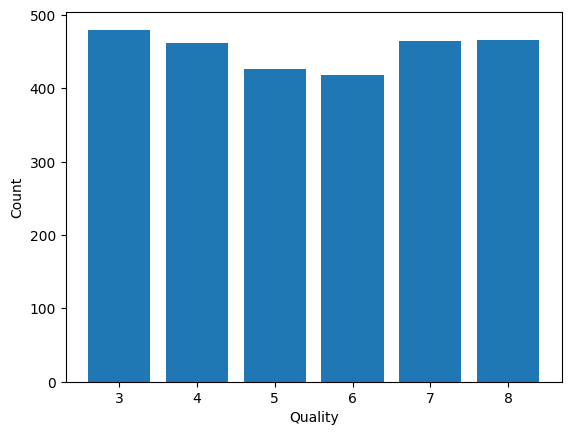

In [ ]:
plt.bar(y.value_counts().index, y.value_counts().values)
plt.xlabel("Quality")
plt.ylabel("Count")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.97      1.00      0.99       102
           4       0.92      0.98      0.95       103
           5       0.76      0.72      0.74        76
           6       0.80      0.66      0.72        85
           7       0.88      0.93      0.91        98
           8       0.95      1.00      0.98        80

    accuracy                           0.89       544
   macro avg       0.88      0.88      0.88       544
weighted avg       0.89      0.89      0.89       544



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
gb = GradientBoostingClassifier(max_depth=1, n_estimators=100)
gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=1)

In [ ]:
y_pred_gb = gb.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           3       0.83      0.93      0.88       102
           4       0.61      0.54      0.57       103
           5       0.58      0.55      0.56        76
           6       0.50      0.39      0.44        85
           7       0.67      0.69      0.68        98
           8       0.74      0.90      0.81        80

    accuracy                           0.67       544
   macro avg       0.65      0.67      0.66       544
weighted avg       0.66      0.67      0.66       544



In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           3       0.91      1.00      0.95       102
           4       0.81      0.85      0.83       103
           5       0.68      0.57      0.62        76
           6       0.68      0.62      0.65        85
           7       0.83      0.72      0.77        98
           8       0.82      1.00      0.90        80

    accuracy                           0.80       544
   macro avg       0.79      0.79      0.79       544
weighted avg       0.80      0.80      0.80       544



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_classes = np.argmax(y_pred_ann, axis=1)
print(classification_report(y_test_encoded, y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       102
           1       0.36      0.93      0.52       103
           2       0.75      0.04      0.07        76
           3       0.00      0.00      0.00        85
           4       1.00      0.04      0.08        98
           5       0.46      1.00      0.63        80

    accuracy                           0.47       544
   macro avg       0.56      0.46      0.34       544
weighted avg       0.57      0.47      0.36       544



In [ ]:
import joblib

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV


In [ ]:
from sklearn.model_selection import KFold
Kf = KFold(shuffle=True,n_splits=5)
param_space = {
        'n_estimators': (10, 100),
        'max_depth': (3, 10),
        'min_samples_split': (2, 10),
    }

In [ ]:
bscv = BayesSearchCV(rf, param_space, n_iter=32, cv=Kf, scoring='accuracy')

In [ ]:
bscv.fit(x_train,y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
              estimator=RandomForestClassifier(), n_iter=32, scoring='accuracy',
              search_spaces={'max_depth': (3, 10), 'min_samples_split': (2, 10),
                             'n_estimators': (10, 100)})

In [ ]:
best_model = bscv.best_estimator_

In [ ]:
y_pred_cv = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           3       0.97      1.00      0.99       102
           4       0.88      0.98      0.93       103
           5       0.78      0.68      0.73        76
           6       0.83      0.68      0.75        85
           7       0.88      0.94      0.91        98
           8       0.96      1.00      0.98        80

    accuracy                           0.89       544
   macro avg       0.88      0.88      0.88       544
weighted avg       0.89      0.89      0.89       544



In [ ]:
from sklearn.model_selection import GridSearchCV
param_space = {
        'n_estimators': (10, 100),
        'max_depth': (3, 10),
        'min_samples_split': (2, 10),
    }

In [ ]:
gscv = GridSearchCV(rf, param_space, cv=Kf, scoring='accuracy')

In [ ]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': (3, 10), 'min_samples_split': (2, 10),
                         'n_estimators': (10, 100)},
             scoring='accuracy')

In [ ]:
y_pred_gscv = gscv.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_gscv))

              precision    recall  f1-score   support

           3       0.97      1.00      0.99       102
           4       0.89      0.97      0.93       103
           5       0.74      0.67      0.70        76
           6       0.79      0.66      0.72        85
           7       0.89      0.92      0.90        98
           8       0.93      1.00      0.96        80

    accuracy                           0.88       544
   macro avg       0.87      0.87      0.87       544
weighted avg       0.88      0.88      0.88       544



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=[('rf',rf),('gscv',gscv),('svc',svc)],final_estimator=LogisticRegression())

In [ ]:
sc.fit(x_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gscv',
                                GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                                             estimator=RandomForestClassifier(),
                                             param_grid={'max_depth': (3, 10),
                                                         'min_samples_split': (2,
                                                                               10),
                                                         'n_estimators': (10,
                                                                          100)},
                                             scoring='accuracy')),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_sc = sc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_sc))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       102
           4       0.93      0.97      0.95       103
           5       0.79      0.76      0.78        76
           6       0.78      0.73      0.76        85
           7       0.91      0.92      0.91        98
           8       0.96      1.00      0.98        80

    accuracy                           0.90       544
   macro avg       0.90      0.90      0.90       544
weighted avg       0.90      0.90      0.90       544



In [ ]:
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test,y_pred_sc))

0.35871502698971963


In [ ]:
# prompt: save the randomforestclassifier rf model as a joblif file

# Save the hyperparameter model
joblib.dump(sc, 'stacked_model.joblib')

['stacked_model.joblib']